Introduction

Analyse Exploratoire des Facteurs de Risque d'Accident Vasculaire Cérébral
Les accidents vasculaires cérébraux (AVC) représentent l'une des principales causes de mortalité et d'invalidité dans le monde. Selon l'Organisation Mondiale de la Santé, environ 15 millions de personnes souffrent d'un AVC chaque année, dont 5 millions décèdent et 5 millions restent handicapées de façon permanente. La prévention et la détection précoce des risques d'AVC constituent donc un enjeu majeur de santé publique.
Ce notebook présente une analyse exploratoire approfondie d'un jeu de données contenant diverses caractéristiques démographiques et médicales de patients, avec pour objectif d'identifier et de comprendre les facteurs de risque associés aux accidents vasculaires cérébraux.
Objectifs de l'analyse
Explorer la distribution des différentes variables dans le jeu de données
Identifier les corrélations potentielles entre les caractéristiques des patients et la survenue d'AVC
Examiner l'impact de facteurs tels que l'âge, le genre, l'hypertension, les maladies cardiaques et le niveau de glucose sur le risque d'AVC
Préparer les données pour une future modélisation prédictive
Cette analyse s'inscrit dans une démarche de data science appliquée au domaine médical, visant à contribuer à une meilleure compréhension des facteurs de risque d'AVC et, à terme, à développer des outils de prédiction qui pourraient aider les professionnels de santé dans la prévention et la prise en charge précoce des patients à risque.

In [2]:
#Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 ***__Exploration des donnés___***:





In [4]:
#Chargement des données
df=pd.read_csv('/content/gdrive/MyDrive/FOR NEXA/Stroke_Prediction/stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#Dimension de la dataset
print(f"le nombre d'observations est {df.shape[0]}")
print(f"le nombre de variables est {df.shape[1]}")

le nombre d'observations est 5110
le nombre de variables est 12


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
for col in df.select_dtypes(include='object').columns:
  print(f"{col}: {df[col].unique}")

gender: <bound method Series.unique of 0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object>
ever_married: <bound method Series.unique of 0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105    Yes
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 5110, dtype: object>
work_type: <bound method Series.unique of 0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object>
Residence_type: <bound method Series.unique of 0       Urban
1       Rural
2       Rural
3       Urban
4       Rural
        ...  
5105    Urban
5106    Urban
5107    Rural
5108    Rural
5109    Ur

In [9]:
for col in df.select_dtypes(include='float64').columns:
  print(f"{col}: {df[col].unique}")

age: <bound method Series.unique of 0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64>
avg_glucose_level: <bound method Series.unique of 0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64>
bmi: <bound method Series.unique of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>


In [10]:
df['stroke'].value_counts(normalize='True')*100

,proportion
stroke,
0,95.127202
1,4.872798


In [11]:
df['gender'].value_counts(normalize='True')*100

,proportion
gender,
Female,58.590998
Male,41.389432
Other,0.019569


__Visualisation intelligente__

In [12]:
sb.set(style='whitegrid')

Text(0.5, 1.0, "Ditribution de l'age selon l'AVC")

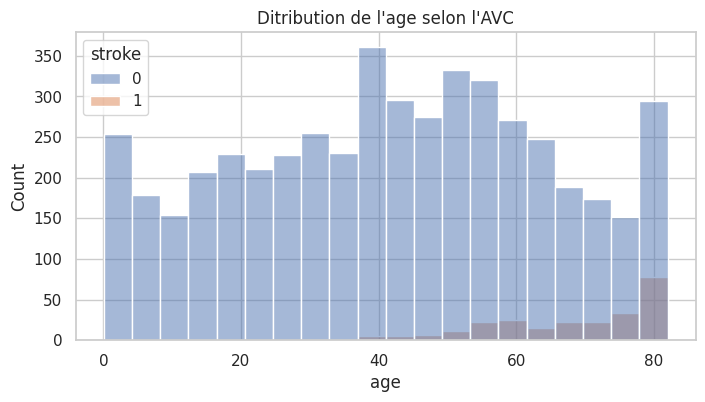

In [13]:
#Analyse de la relation entre l'age et l'AVC
plt.figure(figsize=(8,4))
sb.histplot(data=df, x='age', hue='stroke')
plt.title("Ditribution de l'age selon l'AVC" )

Text(0.5, 1.0, "Dsitribution du sexe selon l'AVC")

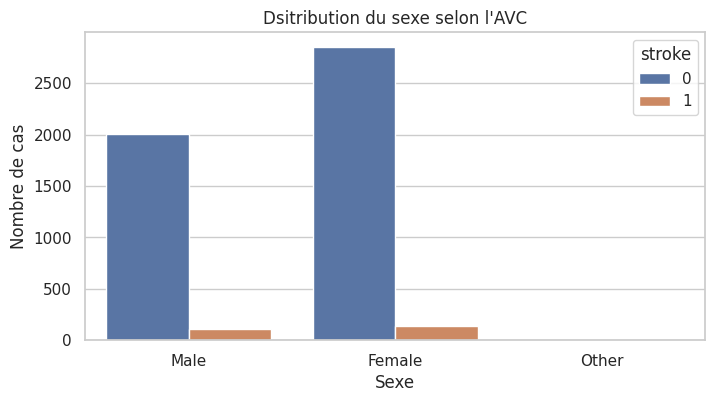

In [14]:
#Analyse de la relation entre le sexe et l'AVC
plt.figure(figsize=(8,4))
sb.countplot(data=df, x='gender', hue='stroke')
plt.xlabel('Sexe')
plt.ylabel('Nombre de cas')
plt.title("Dsitribution du sexe selon l'AVC")

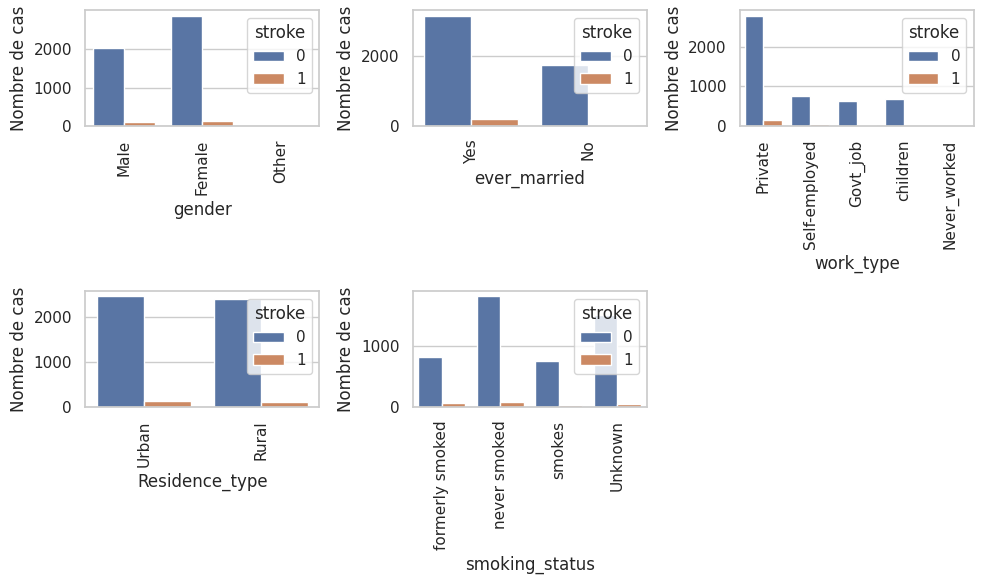

In [18]:
#Detection des colonne de type 'objet'
Object_features=[]
for col in df.select_dtypes(include='object'):
  Object_features.append(col)
#Relation avec la variable 'stroke'
plt.figure(figsize=(10,6))
for i, feature in enumerate(Object_features):
  plt.subplot(2, 3, i+1)
  sb.countplot(data=df, x=feature, hue='stroke')
  plt.xlabel(feature)
  plt.xticks(rotation='vertical')
  plt.ylabel('Nombre de cas')
plt.tight_layout()

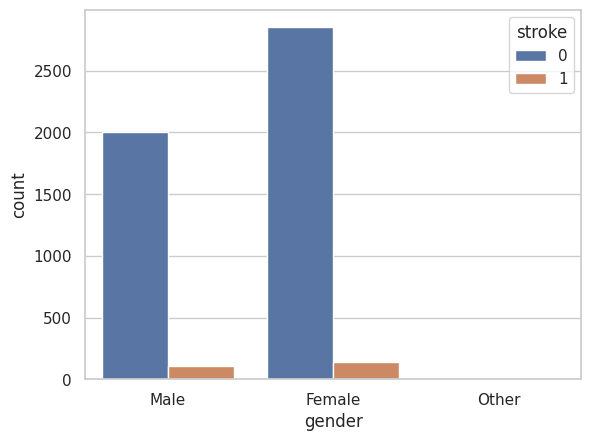

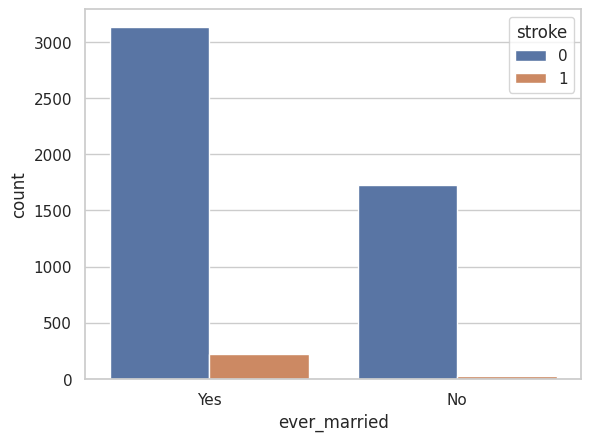

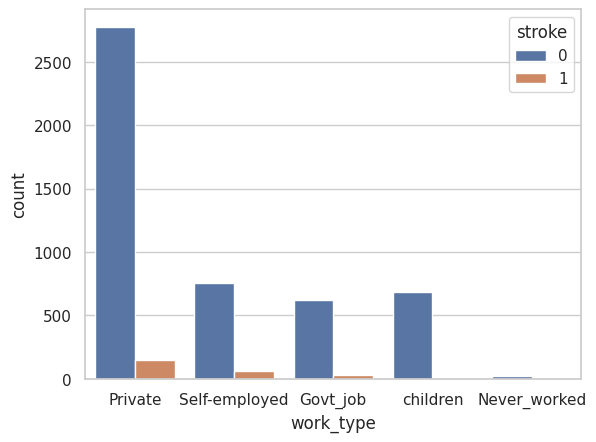

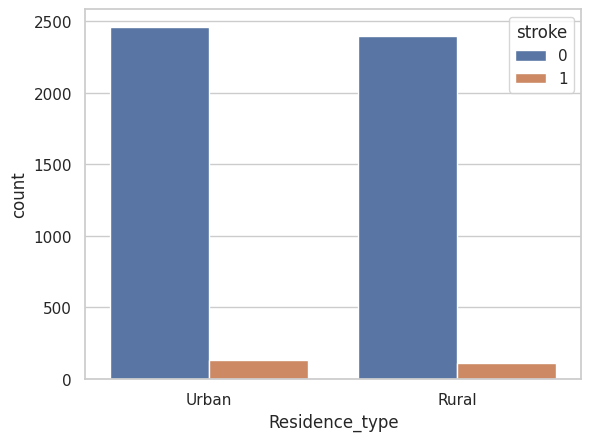

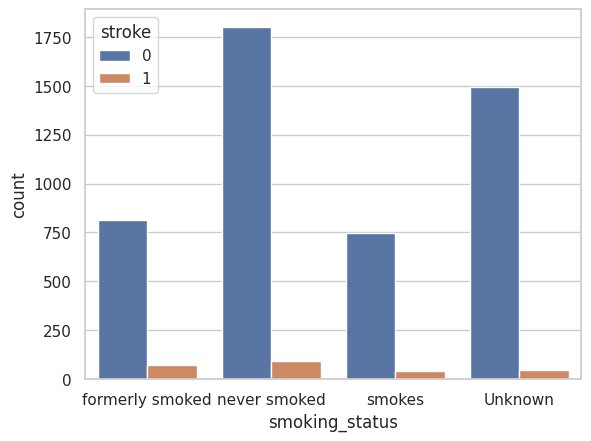

In [ ]:
for col in Object_features:
  plt.figure()
  sb.countplot(data=df, x=col, hue='stroke')

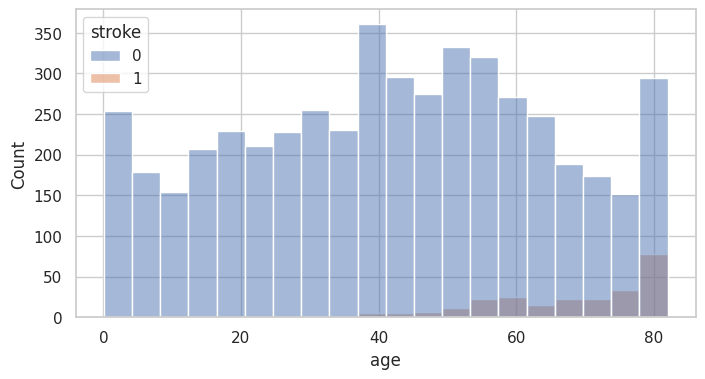

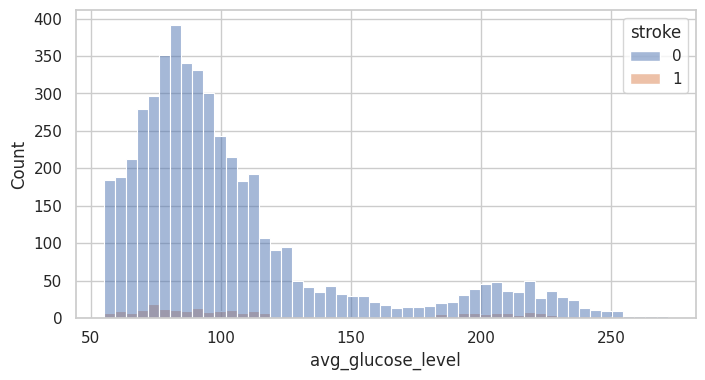

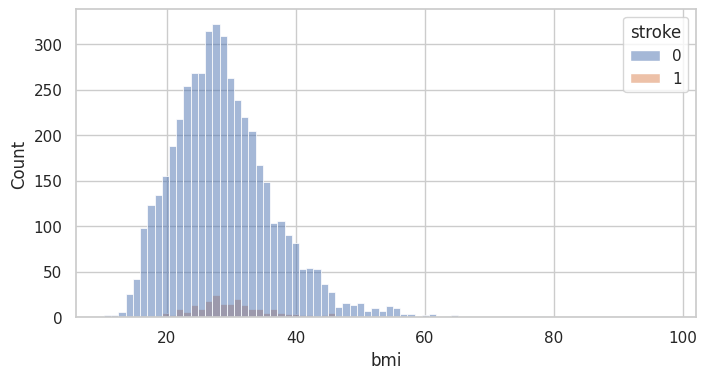

In [ ]:
Float_features=[]

for col in df.select_dtypes(include='float64'):
  Float_features.append(col)
for i in Float_features:
  plt.figure(figsize=(8,4))
  sb.histplot(data=df, x=i, hue='stroke')
  plt.xlabel(i)

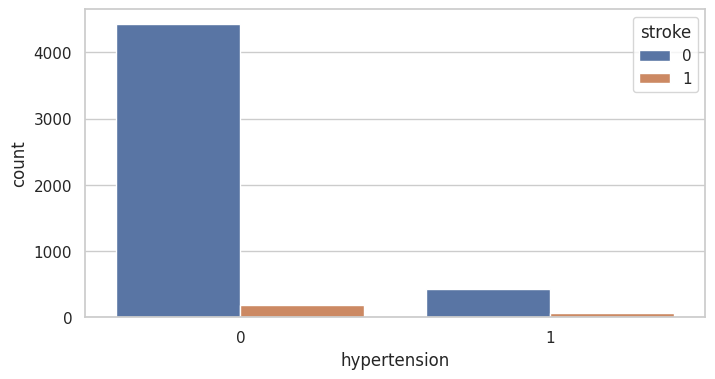

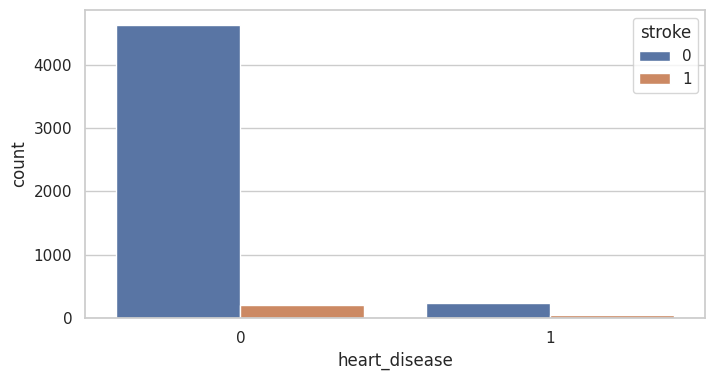

In [ ]:
#Int_features
int_features=[]
for col in df.select_dtypes(include='int64'):
  int_features.append(col)
#Analyse des données de types 'int64'
for i in int_features:
  if i=='id' or i=='stroke':
    continue;
  else:
    plt.figure(figsize=(8,4))
    sb.countplot(data=df, x=i, hue='stroke')


Text(0.5, 1.0, 'Nuage de points:AGE vs BMI coloré par AVC ')

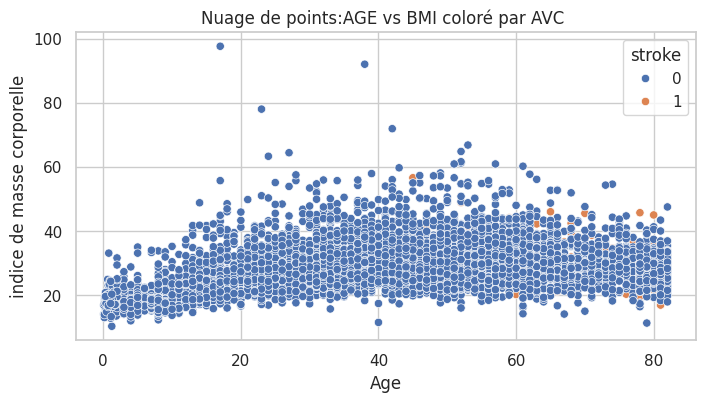

In [ ]:
#Nuage de points:AGE vs BMI coloré par AVC
plt.figure(figsize=(8,4))
sb.scatterplot(data=df, x='age', y='bmi', hue='stroke')
plt.xlabel('Age')
plt.ylabel('indice de masse corporelle')
plt.title('Nuage de points:AGE vs BMI coloré par AVC ')

Text(0.5, 1.0, 'Nuage de point AGE vs Niveau de glucose')

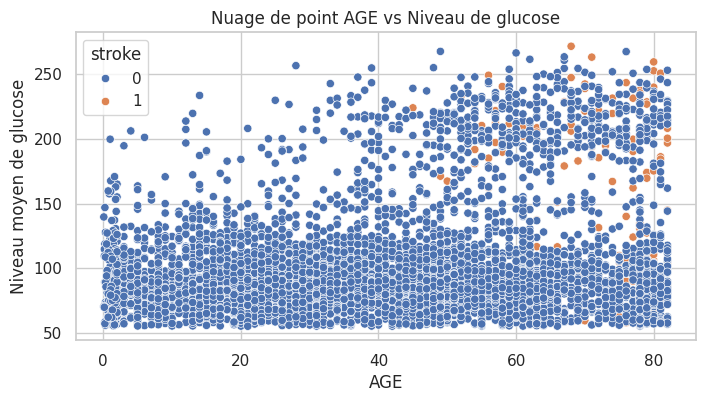

In [ ]:
#Nuage de point AGE vs Niveau de Glucose
plt.figure(figsize=(8,4))
sb.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.xlabel('AGE')
plt.ylabel('Niveau moyen de glucose')
plt.title('Nuage de point AGE vs Niveau de glucose')

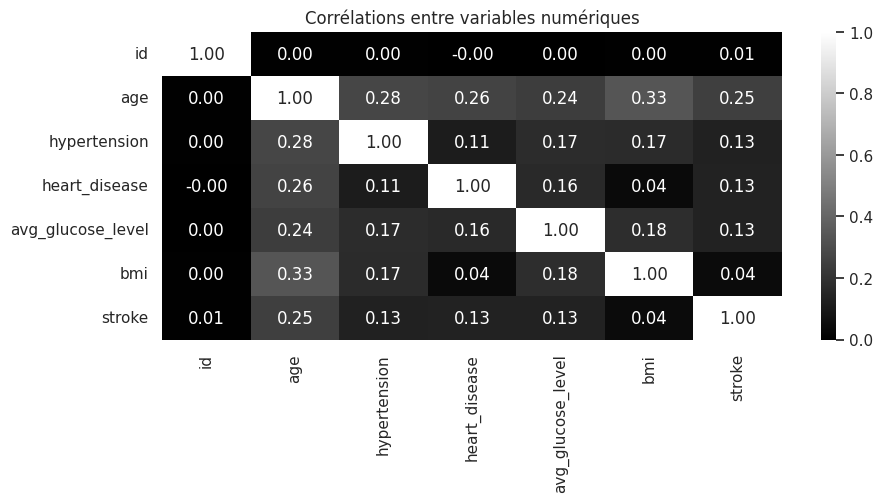

In [ ]:
#Correleation des differentes variables avec stroke
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(numerical_only=True), fmt=".2f", annot=True, cmap='viridis')


__Nettoyage et préparation des données__

In [ ]:
#Valeurs abberantes ne sont présentes que dans la colonne 'bmi'
df[df['bmi'].isnull()].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


In [ ]:
#Nombre de val abbérantes dans la colonne 'bmi'
df['bmi'].isnull().sum()

np.int64(201)

In [ ]:
#Remplissage des NAs dans la colonne bmi par la mediane
df['bmi'].fillna(df['bmi'].median(), inplace=True)

<ipython-input-29-4a43db8ae24e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [ ]:
#Vérification du résultat de remplissage
df['bmi'].isnull().sum()

np.int64(0)

In [ ]:
#Suppression de touts des NANs
df[df['bmi'].isnull()].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


<Axes: >

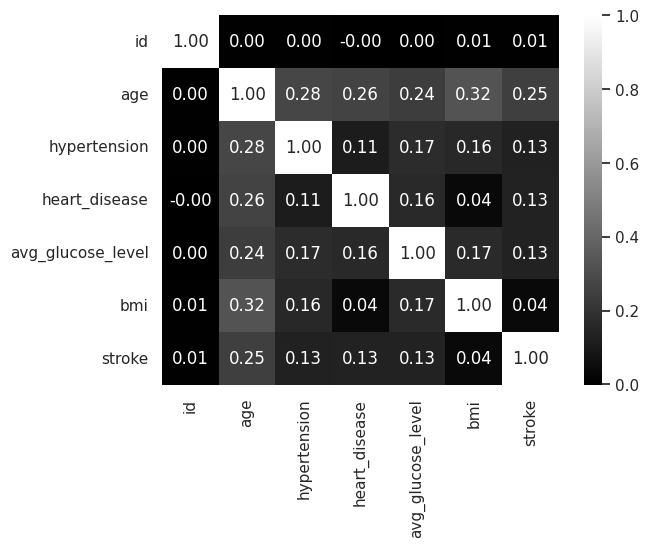

In [ ]:
#Vérification de corrélation après la suppression des NANs
sb.heatmap(df.corr(numeric_only=True), annot=True, cmap='gray', fmt='.2f')

In [ ]:
#Suppression du sexe 'other' dans la colonne 'gender' commen c'est très rare (un seul cas)
df=df[df['gender'] != 'Other']
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#vérification de la suppression du sexe 'Other'
df['gender'].value_counts(normalize=True)*100

,proportion
gender,
Female,58.602466
Male,41.397534


In [ ]:
#Binarisation des données de type 'objet'
df_encoded=pd.get_dummies(df, drop_first=True).astype('int')
df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,228,36,1,1,1,0,1,0,0,1,1,0,0
1,51676,61,0,0,202,28,1,0,1,0,0,1,0,0,0,1,0
2,31112,80,0,1,105,32,1,1,1,0,1,0,0,0,0,1,0
3,60182,49,0,0,171,34,1,0,1,0,1,0,0,1,0,0,1
4,1665,79,1,0,174,24,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
#Séparation des données features-cibles
X=df_encoded.drop('stroke', axis=1)
X=X.drop('id', axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,0,1,0,0,1,1,0,0
1,61,0,0,202,28,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,0,1,0,0,1,0,0,0,1,0


In [ ]:
#Séparation des données features-cibles
Y=df_encoded['stroke']
Y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [ ]:
#Standarisation
eca_type_X=X.std(numeric_only=True)
mean_X=X.mean(numeric_only=True)
X_scaled_manual=(X-mean_X)/eca_type_X
mean_X.head()

,0
age,43.218634
hypertension,0.097475
heart_disease,0.054022
avg_glucose_level,105.651008
bmi,28.432179


In [ ]:
#Standarisation en utilsant sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled_sk=scaler.fit_transform(X)

In [ ]:
#Comparaison des résultats
from sklearn.metrics import r2_score

r2=r2_score(X_scaled_manual, X_scaled_sk)

print(f"le coefficient de détermination est {r2:.2f}")


le coeffficient de détermination est 1.00


In [ ]:
X_scaled=X_scaled_sk

__Création du modèle__

In [ ]:
#Séparation des données train_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
Y_test.value_counts()

,count
stroke,
0,972
1,50


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1500)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1500)

In [ ]:
Y_predict=model.predict(X_test)

In [ ]:
ones=0
zeros=0
for i in Y_predict:
  if i==1:
    ones=ones+1
  else:
    zeros=zeros+1
print(f"predicted_stroke={ones},\npredicted non_stroke={zeros}")


predicted_stroke=1,
predicted non_stroke=1021


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_predict, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1021
           1       0.02      1.00      0.04         1

    accuracy                           0.95      1022
   macro avg       0.51      0.98      0.51      1022
weighted avg       1.00      0.95      0.97      1022



Text(0.5, 1.0, 'Matrice de confusion')

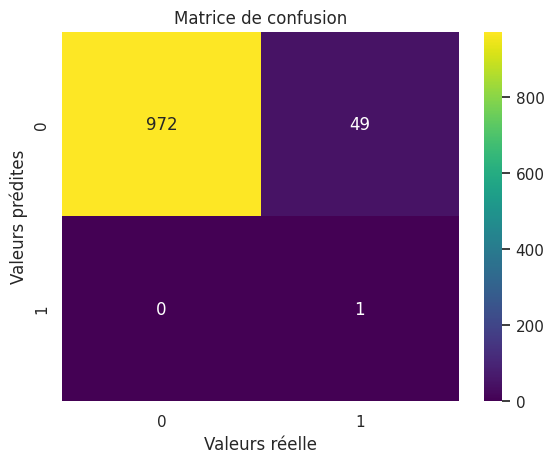

In [ ]:
cm=confusion_matrix(Y_predict, Y_test)

plt.figure()
sb.heatmap(data=cm, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Valeurs réelle')
plt.ylabel('Valeurs prédites')
plt.title('Matrice de confusion')

Conclusion

Synthèse de l'Analyse des Facteurs de Risque d'AVC
Cette analyse exploratoire des données sur les accidents vasculaires cérébraux a permis de mettre en évidence plusieurs facteurs de risque significatifs et d'établir une base solide pour de futures analyses prédictives.
Principaux enseignements
Notre exploration a révélé plusieurs tendances importantes :
L'âge apparaît comme un facteur de risque majeur, avec une augmentation significative de l'incidence des AVC chez les personnes âgées de plus de 60 ans.
L'hypertension et les maladies cardiaques préexistantes sont fortement associées à un risque accru d'AVC, confirmant les connaissances médicales établies sur ces comorbidités.
Le niveau de glucose sanguin élevé montre une corrélation positive avec la survenue d'AVC, soulignant l'importance du contrôle glycémique dans la prévention.
L'indice de masse corporelle (IMC) présente également une association avec le risque d'AVC, bien que cette relation soit moins prononcée que pour d'autres facteurs.
Les facteurs démographiques comme le genre et le type de résidence (urbain/rural) semblent avoir un impact plus modéré sur le risque d'AVC dans notre jeu de données.
Limites de l'étude
Cette analyse présente certaines limitations qu'il convient de mentionner :
Le jeu de données contient des valeurs manquantes, notamment pour l'IMC, ce qui a nécessité des techniques d'imputation pouvant introduire des biais.
Le déséquilibre entre les cas positifs (AVC) et négatifs (non-AVC) peut affecter l'interprétation des résultats.
Les associations observées sont corrélationnelles et non causales, nécessitant une validation clinique supplémentaire.
Perspectives futures
Cette analyse exploratoire ouvre la voie à plusieurs développements prometteurs :
Modélisation prédictive : Développer des modèles de machine learning (régression logistique, random forest, etc.) pour prédire le risque d'AVC à partir des facteurs identifiés.
Stratification du risque : Créer un système de score permettant d'identifier les patients à haut risque nécessitant une surveillance accrue.
Analyse d'interactions : Explorer plus en profondeur les interactions entre différents facteurs de risque pour mieux comprendre leurs effets combinés.
Application pratique : Concevoir un outil d'aide à la décision pour les professionnels de santé, facilitant l'identification précoce des patients à risque.
En conclusion, cette analyse exploratoire constitue une première étape importante dans la compréhension des facteurs de risque d'AVC. Les résultats obtenus fournissent une base solide pour des recherches plus approfondies et le développement d'outils prédictifs qui pourraient contribuer à réduire l'incidence et l'impact des accidents vasculaires cérébraux dans la population.